# Modelling 3-body particle decays on the Dalitz plot

In this assignment you will generate and then fit 2 interfering decays of a $D_s^+$ meson. The $D_s^+$ meson constitutes a bound state of a Charm and anti-Strange quark,  $c\bar{s}$.

The decay of a $D_s^+$ meson to 2 kaons and a pion, written as

$$D_s^+ \rightarrow K^+ K^- \pi^+$$

can proceed through different intermediate particles known as resonances. Consider 2 decay paths involving resonances $A$ and $B$

$$D_s^+ \rightarrow A(\rightarrow K^+ K^-) \pi^+$$
$$D_s^+ \rightarrow K^+ B(\rightarrow K^- \pi^+)$$

In the first decay a $D_s^+$ meson decays to resonance $A$ and a $\pi^+$, resonance $A$ then subseqently decays to a $K^+$ and a $K^-$. In the second decay a $D_s^+$ meson decays to resonance $B$ and a $K^+$, resonance $B$ then subseqently decays to a $K^-$ and a $\pi^+$. 

Because the initial and final states of the 2 decay paths are the same they exhibit quantum mechanical interference effects. This is similar to Young's double slit experiment where light taking two indistinguishable paths makes interference effects on a screen.

## The Dalitz plot

$D_s$ mesons, kaons and pions are known as pseudoscalar particles and have 0 spin. A 3-body decay with pseudoscalar particles in the intial and final state can be fully described by only 2 independent variables, ie. decay *events* can be illustrated on a 2-D plot. If this plot has axes equal to the invariant mass squared of different pairs of the final state particles it is known as a Dalitz plot.

A Dalitz plot is used to illustrate 3-body decays, showing the resonances involved in a decay and any interference effects between them. Below (left) is a "toy" (unphysical/made-up) example for the $D_s^+ \rightarrow K^+ K^- \pi^+$ decay. On the x-axis is the invariant mass squared of the $K^+ K^-$ system, $m^2_{KK}$, and on the y-axis the invariant mass squared of the $K^- \pi^+$ system, $m^2_{K\pi}$. From it we can see

* A resonance with mass $\approx \sqrt{1.2}$ $\mathrm{GeV}/c^2$ that decays into $K^- \pi^+$ 
* A resonance with mass $\approx \sqrt{1.5}$ $\mathrm{GeV}/c^2$ that decays into $K^+ K^-$ 
* Destructive interference where the resonances overlap in the Dalitz plot indicated by a reduced event density

This is what we will simulate and fit in this project.

Below (right) is an illustration of the kinematic boundaries of the Dalitz plot, enforced via conservation of energy and momentum, giving Dalitz plots their distinctive shape. Here the decay $D_s^+ \rightarrow K^+ K^- \pi^+$ is notated as $M^+ \rightarrow 1^+ 2^+ 3^-$ and natural units are used where $c=1$ (hence the units on the axis labels). There is a very nice [Quantum Diaries entry](http://www.quantumdiaries.org/2012/11/02/a-dalitz-what-now/) explaining Dalitz plots. Note that we will be considering toy $D_s^+ \rightarrow K^+ K^- \pi^+$ resonances and will not be considering the spin of resonances.


<img src="https://gitlab.cern.ch/uploads/-/system/personal_snippet/2943/63fc8ba8509fe49173d12bb2afa9d2e8/Dalitz.png" width="475" height="400" />
<img src="http://www.quantumdiaries.org/wp-content/uploads/2012/11/dalits_boundary.png" width="475" height="400" />





### Task 1

Write a function(s) that generates $n$ decay events of $D_s^+ \rightarrow K^+ K^- \pi^+$ that are uniformly distributed over the allowed phasespace. The parameter $n$ should be an argument of your function. Plot these events on a Dalitz plot for $n=100000$ using a `hist2d` with 300x300 bins. 

* "Allowed phasespace" here refers to the kinematically allowed region of the Dalitz plot, ie. the area shown in the example Dalitz plots above. 

* Use the same units ($\mathrm{GeV}^2/c^4$) and axes as in the example Dalitz plot on the left. To ease communication and make the code clearer we will use $d \rightarrow a b c$ notation for the decay such that you will be working with the variables:

  * `m2ab` - the invariant mass squared of the $K^+ K^-$ system 
  * `m2bc` - the invariant mass squared of the $K^- \pi^+$ system
  * `md, ma, mb, mc` - the masses of the decaying $D_s$ meson and the 3 decay products respectively

* The masses you should use are

  * `m_dmeson=1.97`
  * `m_kaon=0.498`
  * `m_pion=0.135`


Hint: Use the accept-reject Monte Carlo method with NumPy functions. You only need to generate `m2ab` and `m2bc` values for the events. The range of `m2bc` values kinematically allowed given a `m2ab` value can be found in eqn 49.23a and 49.23b of the [PDG review](https://pdg.lbl.gov/2023/reviews/rpp2023-rev-kinematics.pdf) (note that the PDG uses $M^+ \rightarrow 1^+ 2^+ 3^-$ notation)

**Marking:**
* Function(s) that generates events within allowed phasespace **[2]**
* Events are uniformly distributed over allowed phasespace **[1]**
* $n$ events are returned by function(s) where $n$ is an argument of the function ie. the inefficiency of the accept-reject method is handled **[1]**
* Suitable plot with correct distribution and axis labels **[1]**


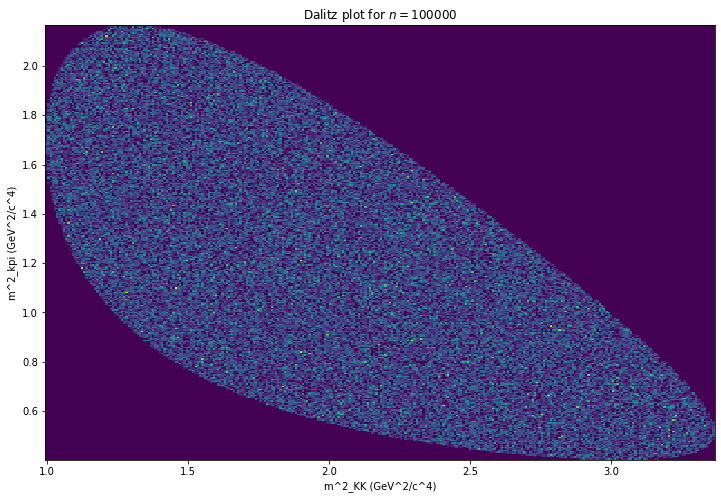

In [1]:
#Task 1
import numpy as np
import matplotlib.pyplot as plt

n = 100000
m_dmeson = 1.97
m_kaon = 0.498
m_pion = 0.135

def E_star_2(m2ab, ma, mb):
    return (m2ab - ma**2 + mb**2) / (2 * np.sqrt(m2ab))

def E_star_3(m2ab, md, mc):
    return (md**2 - m2ab - mc**2) / (2 * np.sqrt(m2ab))

def m2bc_limits(m2ab, ma, mb, mc, md):
    E2 = E_star_2(m2ab, ma, mb)
    E3 = E_star_3(m2ab, md, mc)
    p2 = np.sqrt(E2**2 - mb**2)
    p3 = np.sqrt(E3**2 - mc**2)
    m2bc_min = (E2 + E3)**2 - (p2 + p3)**2
    m2bc_max = (E2 + E3)**2 - (p2 - p3)**2
    return m2bc_min, m2bc_max

def generate_uniform_events(n, md, ma, mb, mc):
    events = []
    count = 0
    while count < n:
        m2ab = np.random.uniform(4 * mb**2, (md - mc)**2)
        m2bc_min, m2bc_max = m2bc_limits(m2ab, ma, mb, mc, md)
        m2bc = np.random.uniform(m2bc_min, m2bc_max)
        if np.random.random() <= (m2bc_max - m2bc_min) / (md**2 - (ma + mc)**2):
            events.append((m2ab, m2bc))
            count += 1
    return np.array(events)


events = generate_uniform_events(n, m_dmeson, m_kaon, m_kaon, m_pion)

plt.figure(figsize=(12, 8))
plt.hist2d(events[:, 0], events[:, 1], bins=300)
plt.xlabel('m^2_KK (GeV^2/c^4)')
plt.ylabel('m^2_kpi (GeV^2/c^4)')
plt.title('Dalitz plot for $n=100000$')
plt.show()

### Task 2

The amplitude of an isolated resonance decaying into particles $a$ and $b$ can be described by the complex Breit Wigner function

$$A=\frac{1}{(m_{res}^2-m2ab) - i(m_{res} \times \Gamma_{res})}$$

where $m_{res}$ and $\Gamma_{res}$ are the mass and width of the resonance and `m2ab` is the invariant mass of the $a$ and $b$ two particle system as above (this is a simplification, in reality there are also spin and form factors).

What we observe on the Dalitz plot is not the amplitude but the amplitude squared.

Write a function that generates $n=5000$ $D_s^+ \rightarrow K^+ K^- \pi^+$ events decaying through a resonance in the $K^+ K^-$ system and show these events on a Dalitz plot along with 10000 "phasespace" events from task 1 - these events act like "background" to your $D_s^+ \rightarrow K^+ K^- \pi^+$ signal events. The resonance should have a mass of 1.3 $\mathrm{GeV}/c^2$ and a width of 0.015 $\mathrm{GeV}/c^2$.

You should see a single, vertical band.

Hint: Use your generator from task 1 to generate kinematically allowed events and use a basic rejection sampling method (look up the [von Neumann method](https://xuwd11.github.io/am207/wiki/rejectionsampling.html)) to generate the Breit Wigner distribution.

**Marking:**

* Function(s) that generates events according to a Breit Wigner squared distribution **[2]**
* Exactly $n$ events are returned by the function(s) where $n$ is an argument of the function **[1]**
* Plot shows correct distribution with axis labels **[1]**

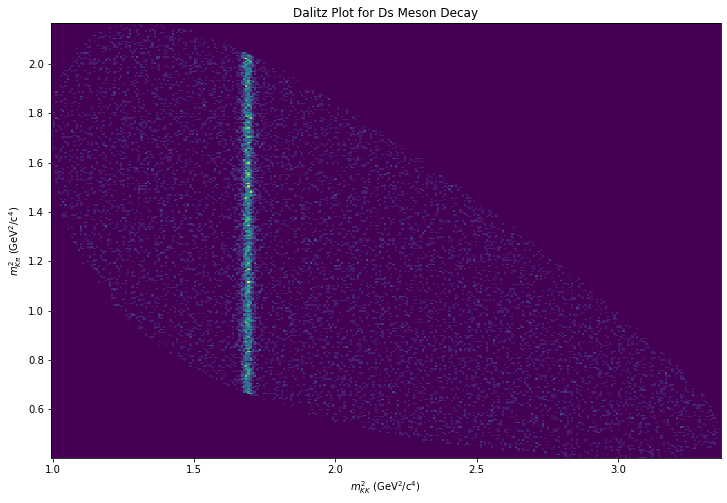

In [2]:
#Task 2
import numpy as np
import matplotlib.pyplot as plt

m_dmeson = 1.97
m_kaon = 0.498
m_pion = 0.135
m_res = 1.3
Gamma_res = 0.015

def breit_wigner_squared(m2ab, m_res, Gamma_res):
    return (1 / (((m_res**2 - m2ab)**2 + (m_res * Gamma_res)**2)))**2

def generate_breit_wigner_events(n, md, ma, mb, mc, m_res, Gamma_res):
    events = []
    max_prob = breit_wigner_squared(m_res**2, m_res, Gamma_res)
    while len(events) < n:
        m2ab = np.random.uniform(4 * mb**2, (md - mc)**2)
        m2bc_min, m2bc_max = m2bc_limits(m2ab, ma, mb, mc, md)
        if m2bc_max > m2bc_min:  # Valid range for m2bc
            m2bc = np.random.uniform(m2bc_min, m2bc_max)
            prob = breit_wigner_squared(m2ab, m_res, Gamma_res)
            if np.random.uniform(0, max_prob) < prob:
                events.append((m2ab, m2bc))
    return np.array(events)

n_resonance_events = 5000
resonance_events = generate_breit_wigner_events(n_resonance_events, m_dmeson, m_kaon, m_kaon, m_pion, m_res, Gamma_res)
n_phase_space_events = 10000
phase_space_events = generate_uniform_events(n_phase_space_events, m_dmeson, m_kaon, m_kaon, m_pion)
all_events = np.vstack((resonance_events, phase_space_events))

plt.figure(figsize=(12, 8))
plt.hist2d(all_events[:, 0], all_events[:, 1], bins=300)
plt.xlabel(r'$m^2_{KK}$ (GeV$^2$/c$^4$)')
plt.ylabel(r'$m^2_{K\pi}$ (GeV$^2$/c$^4$)')
plt.title('Dalitz Plot for Ds Meson Decay')
plt.show()

### Task 3

Create a resonance in the $K^+ K^-$ system with mass 1.3 $\mathrm{GeV}/c^2$ and width 0.015 $\mathrm{GeV}/c^2$ as above and a resonance in the $K^- \pi^+$ system with mass 1.05 $\mathrm{GeV}/c^2$ and width 0.015 $\mathrm{GeV}/c^2$ that interfere with each other.

The amplitudes of the two interfering decay paths, $A_1$ and $A_2$, add coherently to give the total amplitude for the decay. Each decay path is weighted by a complex coefficient

$$A_{TOT}=a_1A_1 + a_2A_2$$

where $a_i=r_ie^{i\theta_i}$. We only care about the relative weighting so you can set the coefficient of the resonance in the $K^+ K^-$ system to $a_1=1$, ie. $r_1=1$ and $\theta_1=0$. Remember the observable on the Dalitz plot is $A_{TOT}^2$.

Show three Dalitz plots where $n=5000$ and where $r_2=1.0$ for
* $\theta_2=0$, 
* $\theta_2=\pi$, 
* $\theta_2=\pi/2$ 

along with 10000 phasespace events from task 1. 

Observe which $\theta$ value corresponds to constructive and which to destructive interference between the decay paths.

Hint: Use the basic rejection sampling method from task 2 in 2D

**Marking:**

* Function that generates events according to distribution of interfering Breit Wigners **[2]**
* Generation of 3 samples with required $\theta_2$ values **[1]**
* Plots showing correct distribution and interference effects with axis labels **[1]**

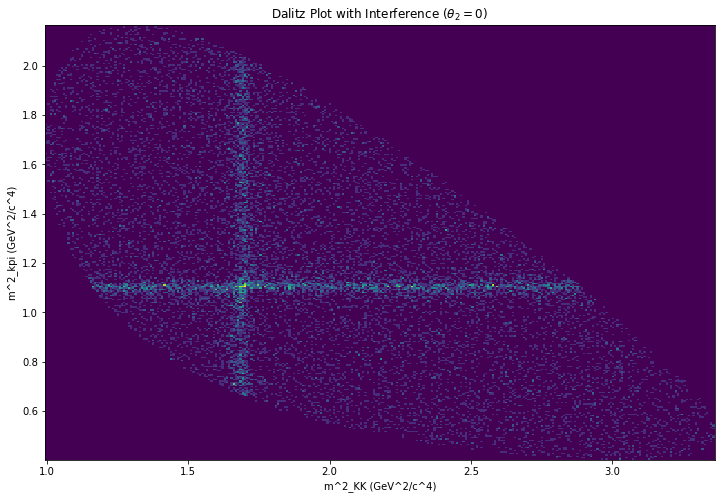

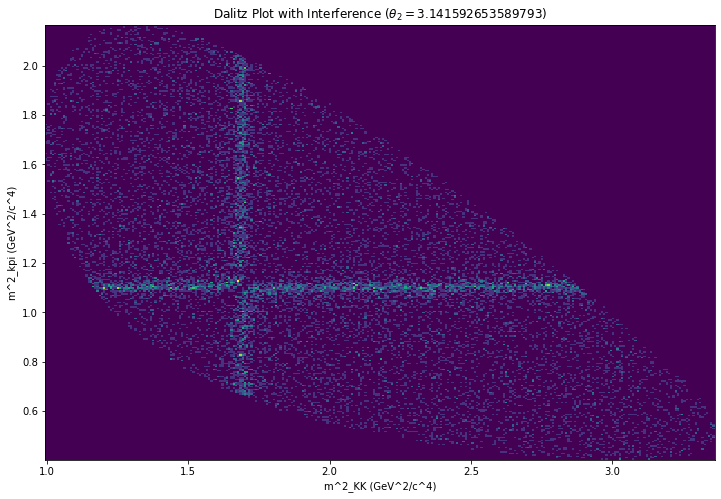

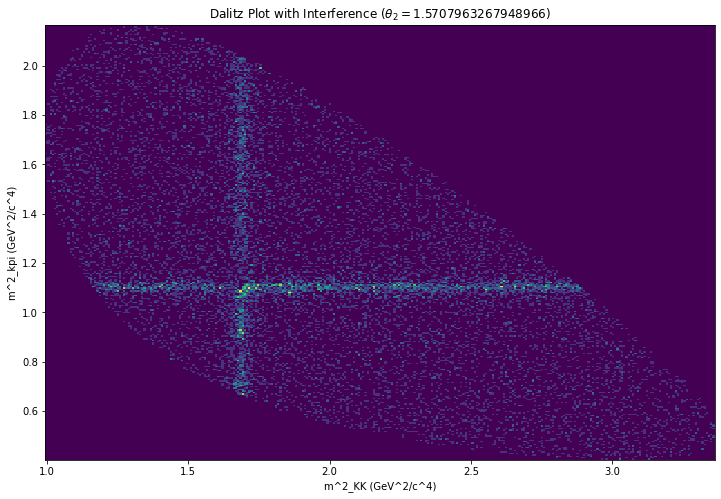

In [3]:
#Task 3
m_res_kk = 1.3
m_res_kpi = 1.05
Gamma_res = 0.015

def breit_wigner(m2, m_res, Gamma_res):
    return 1 / ((m_res**2 - m2) - 1j * (m_res * Gamma_res))

def amplitude_squared(m2ab, m2bc, m_res_kk, m_res_kpi, Gamma_res, r2, theta2):
    a1 = 1
    a2 = r2 * np.exp(1j * theta2)
    A1 = breit_wigner(m2ab, m_res_kk, Gamma_res)
    A2 = breit_wigner(m2bc, m_res_kpi, Gamma_res)
    A_tot = a1 * A1 + a2 * A2
    return np.abs(A_tot)**2

def generate_interfering_events(n, md, ma, mb, mc, m_res_kk, m_res_kpi, Gamma_res, r2, theta2):
    events = []
    max_amp_squared = None
    for m2ab in np.linspace(4 * mb**2, (md - mc)**2, 500):
        m2bc_min, m2bc_max = m2bc_limits(m2ab, ma, mb, mc, md)
        for m2bc in np.linspace(m2bc_min, m2bc_max, 500):
            amp_squared = amplitude_squared(m2ab, m2bc, m_res_kk, m_res_kpi, Gamma_res, r2, theta2)
            if max_amp_squared is None or amp_squared > max_amp_squared:
                max_amp_squared = amp_squared
    while len(events) < n:
        m2ab, m2bc = generate_uniform_events(1, md, ma, mb, mc)[0]
        amp_squared = amplitude_squared(m2ab, m2bc, m_res_kk, m_res_kpi, Gamma_res, r2, theta2)
        
        if np.random.uniform(0, max_amp_squared) < amp_squared:
            events.append((m2ab, m2bc))

    return np.array(events)

theta_values = [0, np.pi, np.pi / 2]
n_interference = 5000
n_background = 10000
background_events = generate_uniform_events(n_background, m_dmeson, m_kaon, m_kaon, m_pion)

for theta2 in theta_values:
    interference_events = generate_interfering_events(n_interference, m_dmeson, m_kaon, m_kaon, m_pion, m_res_kk, m_res_kpi, Gamma_res, 1.0, theta2)

    combined_events = np.vstack((background_events, interference_events))

    plt.figure(figsize=(12, 8))
    plt.hist2d(combined_events[:, 0], combined_events[:, 1], bins=300)
    plt.xlabel('m^2_KK (GeV^2/c^4)')
    plt.ylabel('m^2_kpi (GeV^2/c^4)')
    plt.title(f'Dalitz Plot with Interference ($\\theta_2={theta2}$)')
    plt.show()

### Task 4a

Fit one 2D Dalitz plot distribution that you have generated and try to get back the original values of $r_2$ and $\theta_2$. You may choose which $\theta_2$ distribution you fit. 

Fit your chosen distribution from task 3 without background events ie. fit the sample of $n=5000$ $D_s^+ \rightarrow K^+ K^- \pi^+$ events WITHOUT the 10000 phasespace events added. 

Use a Log-Likelihood fit to achieve this. In a Log-Likelihood fit we minimise the negative of the logarithm of the "Likelihood" value. The metric to minimise is

$$ - Log\mathcal{L} = - \sum_{i=1}^n Log(f(x_i, \phi))$$

where the sum is over the $n$ events we are fitting to at positions $x_i$ on the Dalitz plot. $f$ is the function from task 3 **normalised** and $\phi$ represents the parameters we are fitting for, here $r_2$ and $\theta_2$.

Hint:
* The SciPy function `curve_fit` is unsuitable for this task and you should investigate other SciPy optimisation methods to perform this fit.
* To normalise the function from task 3 you need to use MC integration with events from your phasespace generator from task 1 (try 50000 events). 
* You may want to consider setting bounds on the fit parameters.


### Task 4b

Once you have fit for $r_2$ and $\theta_2$ plot both the data you are fitting and the fit result on 1D projections of the Dalitz plot.

Hint: Think carefully how to scale the fit result "curve" to match the data and be aware of bin centres.

**Marking:**

* Use of MC integration to evaluate the negative of the logarithm of the "Likelihood" value **[2]**
* Use of SciPy library to minimise the above (not `curve_fit`) and report of fit values **[1]**
* 1D projections of data and fit result that is properly scaled with axis labels **[2]**


There are 2 marks available for "speeding up" your code **[2]**

In [4]:
#Task 4a
from scipy.optimize import minimize

n_integration = 50000
def normalize(md, ma, mb, mc, m_res_kk, m_res_kpi, Gamma_res, r2, theta2, n_integration):
    norm_events = generate_uniform_events(n_integration, md, ma, mb, mc)
    sum_amp_squared = np.sum([amplitude_squared(m2ab, m2bc, m_res_kk, m_res_kpi, Gamma_res, r2, theta2)
                              for m2ab, m2bc in norm_events])
    return sum_amp_squared / n_integration

def negative_log_likelihood(params, m2ab_data, m2bc_data, md, ma, mb, mc, m_res_kk, m_res_kpi, Gamma_res, n_integration):
    r2, theta2 = params
    norm = normalize(md, ma, mb, mc, m_res_kk, m_res_kpi, Gamma_res, r2, theta2, n_integration)
    amp_squared_data = amplitude_squared(m2ab_data, m2bc_data, m_res_kk, m_res_kpi, Gamma_res, r2, theta2)
    nll = -np.sum(np.log(amp_squared_data / norm))
    return nll

theta_2_to_fit = np.pi
interference_events_to_fit = generate_interfering_events(5000, m_dmeson, m_kaon, m_kaon, m_pion, m_res_kk, m_res_kpi, Gamma_res, 1.0, theta_2_to_fit)
initial_guess = [1.0, theta_2_to_fit]

result = minimize(
    negative_log_likelihood,
    initial_guess,
    args=(interference_events_to_fit[:, 0], interference_events_to_fit[:, 1], m_dmeson, m_kaon, m_kaon, m_pion, m_res_kk, m_res_kpi, Gamma_res, n_integration),
    bounds=[(0, 2), (-2*np.pi, 2*np.pi)]
)

fitted_r2, fitted_theta2 = result.x
fitted_r2, fitted_theta2, result.success

(1.0000000084383711, 3.1415929719561473, True)

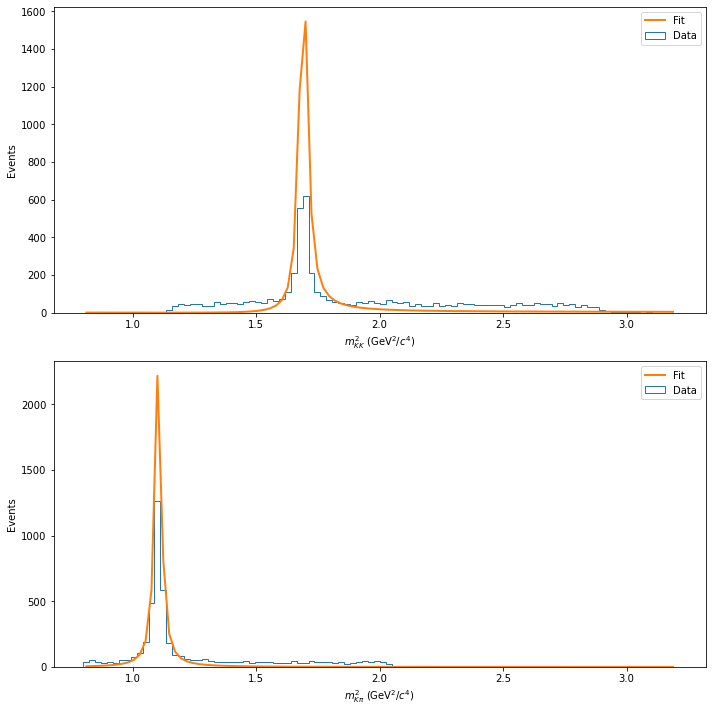

In [5]:
#Task 4b
from scipy.optimize import minimize

def negative_log_likelihood(params, m2ab_data, m2bc_data, md, ma, mb, mc, m_res_kk, m_res_kpi, Gamma_res, norm):
    r2, theta2 = params
    amp_squared_data = amplitude_squared(m2ab_data, m2bc_data, m_res_kk, m_res_kpi, Gamma_res, r2, theta2)
    nll = -np.sum(np.log(amp_squared_data / norm))
    return nll

norm = normalize(m_dmeson, m_kaon, m_kaon, m_pion, m_res_kk, m_res_kpi, Gamma_res, 1.0, theta_2_to_fit, n_integration)

result = minimize(
    negative_log_likelihood,
    initial_guess,
    args=(interference_events_to_fit[:, 0], interference_events_to_fit[:, 1], m_dmeson, m_kaon, m_kaon, m_pion, m_res_kk, m_res_kpi, Gamma_res, norm),
    bounds=[(0, 2), (-2*np.pi, 2*np.pi)]
)
fitted_r2, fitted_theta2 = result.x

def generate_fit_curve(m2ab_data, m2bc_data, m_res_kk, m_res_kpi, Gamma_res, r2, theta2, norm):
    return amplitude_squared(m2ab_data, m2bc_data, m_res_kk, m_res_kpi, Gamma_res, r2, theta2) / norm

bin_edges = np.linspace(0.8, 3.2, 101)
bin_centres = (bin_edges[:-1] + bin_edges[1:]) / 2
fit_curve_m2ab = [generate_fit_curve(m2ab, 0, m_res_kk, m_res_kpi, Gamma_res, fitted_r2, fitted_theta2, norm) for m2ab in bin_centres]
fit_curve_m2bc = [generate_fit_curve(0, m2bc, m_res_kk, m_res_kpi, Gamma_res, fitted_r2, fitted_theta2, norm) for m2bc in bin_centres]
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
data_hist, _ = np.histogram(interference_events_to_fit[:, 0], bins=bin_edges)
fit_curve_scaled_m2ab = fit_curve_m2ab / np.sum(fit_curve_m2ab) * np.sum(data_hist)

axs[0].hist(bin_centres, bins=bin_edges, weights=data_hist, histtype='step', label='Data')
axs[0].plot(bin_centres, fit_curve_scaled_m2ab, label='Fit', lw=2)
axs[0].set_xlabel('$m^2_{KK}$ (GeV$^2/c^4$)')
axs[0].set_ylabel('Events')
axs[0].legend()

data_hist, _ = np.histogram(interference_events_to_fit[:, 1], bins=bin_edges)
fit_curve_scaled_m2bc = fit_curve_m2bc / np.sum(fit_curve_m2bc) * np.sum(data_hist)

axs[1].hist(bin_centres, bins=bin_edges, weights=data_hist, histtype='step', label='Data')
axs[1].plot(bin_centres, fit_curve_scaled_m2bc, label='Fit', lw=2)
axs[1].set_xlabel('$m^2_{K\pi}$ (GeV$^2/c^4$)')
axs[1].set_ylabel('Events')
axs[1].legend()

plt.tight_layout()
plt.show()